## Introdução à Ciência de Dados

### Modelagem de Tópicos e Agrupamento de  documentos  

Este *notebook* está baseado no [Blog analytics vidhya](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/), [no Blog do Brandon Rose](http://www.brandonrose.org) e [no artigo "Top 100 Films of all Time" do Brandon Rose](http://www.brandonrose.org/top100) e no [artigo do Aneesha Bakharia publicado no *Medium* sobre Modelagem de Tópicos](https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730).


In [4]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
import mpld3

import pyLDAvis
import pyLDAvis.gensim

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline
#%matplotlib notebook

### Corpus de textos: Machado Text Corpus

246 documentos
O comprimento médio das palavras 4 (5 quando inclui o espaço em branco)

In [5]:
import nltk
nltk.download('machado')
nltk.corpus.machado.fileids()

[nltk_data] Downloading package machado to /home/heber/nltk_data...
[nltk_data]   Unzipping corpora/machado.zip.


['contos/macn001.txt',
 'contos/macn002.txt',
 'contos/macn003.txt',
 'contos/macn004.txt',
 'contos/macn005.txt',
 'contos/macn006.txt',
 'contos/macn007.txt',
 'contos/macn008.txt',
 'contos/macn009.txt',
 'contos/macn010.txt',
 'contos/macn011.txt',
 'contos/macn012.txt',
 'contos/macn013.txt',
 'contos/macn014.txt',
 'contos/macn015.txt',
 'contos/macn016.txt',
 'contos/macn017.txt',
 'contos/macn018.txt',
 'contos/macn019.txt',
 'contos/macn020.txt',
 'contos/macn021.txt',
 'contos/macn022.txt',
 'contos/macn023.txt',
 'contos/macn024.txt',
 'contos/macn025.txt',
 'contos/macn026.txt',
 'contos/macn027.txt',
 'contos/macn028.txt',
 'contos/macn029.txt',
 'contos/macn030.txt',
 'contos/macn031.txt',
 'contos/macn032.txt',
 'contos/macn033.txt',
 'contos/macn034.txt',
 'contos/macn035.txt',
 'contos/macn036.txt',
 'contos/macn037.txt',
 'contos/macn038.txt',
 'contos/macn039.txt',
 'contos/macn040.txt',
 'contos/macn041.txt',
 'contos/macn042.txt',
 'contos/macn043.txt',
 'contos/ma

termos mais frequentes

In [6]:
import nltk
from nltk.corpus import machado
nltk.download('punkt')
print ('ID | Comprimento Médio das palavras | Comprimento Médio das frases | Diversidade lexical | Documento ')
print (' ---: | ------------------: |  --------------------------: |  :----------------- | :---------')
i=0
n=0
for fileid in machado.fileids():
     i += 1
     num_chars = len(machado.raw(fileid)) 
     num_words = len(machado.words(fileid))
     num_sents = len(machado.sents(fileid))
     num_vocab = len(set(w.lower() for w in machado.words(fileid)))
     n += num_vocab 
     print(i,' | ', round(num_chars/num_words),' | ', round(num_words/num_sents),' | ', round(num_words/num_vocab),' | ', fileid)
print(n)        

[nltk_data] Downloading package punkt to /home/heber/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ID | Comprimento Médio das palavras | Comprimento Médio das frases | Diversidade lexical | Documento 
 ---: | ------------------: |  --------------------------: |  :----------------- | :---------
1  |  5  |  13  |  9  |  contos/macn001.txt
2  |  5  |  16  |  7  |  contos/macn002.txt
3  |  5  |  20  |  7  |  contos/macn003.txt
4  |  5  |  19  |  7  |  contos/macn004.txt
5  |  5  |  18  |  8  |  contos/macn005.txt
6  |  5  |  17  |  6  |  contos/macn006.txt
7  |  5  |  18  |  7  |  contos/macn007.txt
8  |  4  |  12  |  3  |  contos/macn008.txt
9  |  5  |  19  |  4  |  contos/macn009.txt
10  |  5  |  14  |  4  |  contos/macn010.txt
11  |  5  |  15  |  4  |  contos/macn011.txt
12  |  5  |  14  |  4  |  contos/macn012.txt
13  |  5  |  14  |  6  |  contos/macn013.txt
14  |  5  |  13  |  4  |  contos/macn014.txt
15  |  5  |  19  |  4  |  contos/macn015.txt
16  |  5  |  14  |  4  |  contos/macn016.txt
17  |  5  |  13  |  5  |  contos/macn017.txt
18  |  5  |  18  |  4  |  contos/macn018.txt
19 

183  |  5  |  22  |  5  |  cronica/macr01.txt
184  |  5  |  15  |  5  |  cronica/macr02.txt
185  |  5  |  26  |  5  |  cronica/macr03.txt
186  |  5  |  22  |  8  |  cronica/macr04.txt
187  |  5  |  21  |  3  |  cronica/macr05.txt
188  |  5  |  13  |  4  |  cronica/macr06.txt
189  |  5  |  18  |  5  |  cronica/macr07.txt
190  |  5  |  15  |  3  |  cronica/macr08.txt
191  |  5  |  24  |  4  |  cronica/macr09.txt
192  |  5  |  20  |  6  |  cronica/macr10.txt
193  |  5  |  18  |  5  |  cronica/macr11.txt
194  |  5  |  20  |  13  |  cronica/macr12.txt
195  |  5  |  18  |  3  |  cronica/macr13.txt
196  |  5  |  17  |  2  |  cronica/macr14.txt
197  |  5  |  18  |  3  |  cronica/macr15.txt
198  |  5  |  22  |  2  |  cronica/macr16.txt
199  |  5  |  24  |  2  |  cronica/macr17.txt
200  |  5  |  11  |  2  |  cronica/macr18.txt
201  |  5  |  23  |  2  |  cronica/macr19.txt
202  |  5  |  23  |  2  |  cronica/macr20.txt
203  |  5  |  19  |  3  |  cronica/macr21.txt
204  |  5  |  17  |  2  |  cronic

In [15]:
datapath = "datasets/Texts/doccluster/"
outputs = "outputs/"

### 1 - Clustering documents [example](https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python)

Let's create some documents.  

In [16]:
raw_documents = nltk.corpus.machado.fileids()

print("Number of documents:",len(raw_documents))

Number of documents: 246


We will use NLTK to tokenize.  
A document will now be a list of tokens.  

In [17]:
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in raw_documents]

print(gen_docs)

[['contos/macn001.txt'], ['contos/macn002.txt'], ['contos/macn003.txt'], ['contos/macn004.txt'], ['contos/macn005.txt'], ['contos/macn006.txt'], ['contos/macn007.txt'], ['contos/macn008.txt'], ['contos/macn009.txt'], ['contos/macn010.txt'], ['contos/macn011.txt'], ['contos/macn012.txt'], ['contos/macn013.txt'], ['contos/macn014.txt'], ['contos/macn015.txt'], ['contos/macn016.txt'], ['contos/macn017.txt'], ['contos/macn018.txt'], ['contos/macn019.txt'], ['contos/macn020.txt'], ['contos/macn021.txt'], ['contos/macn022.txt'], ['contos/macn023.txt'], ['contos/macn024.txt'], ['contos/macn025.txt'], ['contos/macn026.txt'], ['contos/macn027.txt'], ['contos/macn028.txt'], ['contos/macn029.txt'], ['contos/macn030.txt'], ['contos/macn031.txt'], ['contos/macn032.txt'], ['contos/macn033.txt'], ['contos/macn034.txt'], ['contos/macn035.txt'], ['contos/macn036.txt'], ['contos/macn037.txt'], ['contos/macn038.txt'], ['contos/macn039.txt'], ['contos/macn040.txt'], ['contos/macn041.txt'], ['contos/macn04

We will create a dictionary from a list of documents.  
A dictionary maps every word to a number.  

In [18]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[5])
#print(dictionary.token2id['machado'])
print("Number of words in dictionary:",len(dictionary))

for i in range(len(dictionary)):
    print(i, dictionary[i])

contos/macn006.txt
Number of words in dictionary: 246
0 contos/macn001.txt
1 contos/macn002.txt
2 contos/macn003.txt
3 contos/macn004.txt
4 contos/macn005.txt
5 contos/macn006.txt
6 contos/macn007.txt
7 contos/macn008.txt
8 contos/macn009.txt
9 contos/macn010.txt
10 contos/macn011.txt
11 contos/macn012.txt
12 contos/macn013.txt
13 contos/macn014.txt
14 contos/macn015.txt
15 contos/macn016.txt
16 contos/macn017.txt
17 contos/macn018.txt
18 contos/macn019.txt
19 contos/macn020.txt
20 contos/macn021.txt
21 contos/macn022.txt
22 contos/macn023.txt
23 contos/macn024.txt
24 contos/macn025.txt
25 contos/macn026.txt
26 contos/macn027.txt
27 contos/macn028.txt
28 contos/macn029.txt
29 contos/macn030.txt
30 contos/macn031.txt
31 contos/macn032.txt
32 contos/macn033.txt
33 contos/macn034.txt
34 contos/macn035.txt
35 contos/macn036.txt
36 contos/macn037.txt
37 contos/macn038.txt
38 contos/macn039.txt
39 contos/macn040.txt
40 contos/macn041.txt
41 contos/macn042.txt
42 contos/macn043.txt
43 contos/

Now we will create a corpus. A corpus is a list of bags of words.  
A bag-of-words representation for a document just lists the number of times each word occurs in the document.  

In [19]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
for d in corpus:
    print(d)

[(0, 1)]
[(1, 1)]
[(2, 1)]
[(3, 1)]
[(4, 1)]
[(5, 1)]
[(6, 1)]
[(7, 1)]
[(8, 1)]
[(9, 1)]
[(10, 1)]
[(11, 1)]
[(12, 1)]
[(13, 1)]
[(14, 1)]
[(15, 1)]
[(16, 1)]
[(17, 1)]
[(18, 1)]
[(19, 1)]
[(20, 1)]
[(21, 1)]
[(22, 1)]
[(23, 1)]
[(24, 1)]
[(25, 1)]
[(26, 1)]
[(27, 1)]
[(28, 1)]
[(29, 1)]
[(30, 1)]
[(31, 1)]
[(32, 1)]
[(33, 1)]
[(34, 1)]
[(35, 1)]
[(36, 1)]
[(37, 1)]
[(38, 1)]
[(39, 1)]
[(40, 1)]
[(41, 1)]
[(42, 1)]
[(43, 1)]
[(44, 1)]
[(45, 1)]
[(46, 1)]
[(47, 1)]
[(48, 1)]
[(49, 1)]
[(50, 1)]
[(51, 1)]
[(52, 1)]
[(53, 1)]
[(54, 1)]
[(55, 1)]
[(56, 1)]
[(57, 1)]
[(58, 1)]
[(59, 1)]
[(60, 1)]
[(61, 1)]
[(62, 1)]
[(63, 1)]
[(64, 1)]
[(65, 1)]
[(66, 1)]
[(67, 1)]
[(68, 1)]
[(69, 1)]
[(70, 1)]
[(71, 1)]
[(72, 1)]
[(73, 1)]
[(74, 1)]
[(75, 1)]
[(76, 1)]
[(77, 1)]
[(78, 1)]
[(79, 1)]
[(80, 1)]
[(81, 1)]
[(82, 1)]
[(83, 1)]
[(84, 1)]
[(85, 1)]
[(86, 1)]
[(87, 1)]
[(88, 1)]
[(89, 1)]
[(90, 1)]
[(91, 1)]
[(92, 1)]
[(93, 1)]
[(94, 1)]
[(95, 1)]
[(96, 1)]
[(97, 1)]
[(98, 1)]
[(99, 1)]
[(100, 1)]

Now we create a tf-idf model from the corpus.

In [20]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
print(s)

TfidfModel(num_docs=246, num_nnz=246)
246


Now we will create a similarity measure object in tf-idf space.  

In [21]:
sims = gensim.similarities.Similarity(outputs,tf_idf[corpus],num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 246 documents in 0 shards (stored under outputs/)
<class 'gensim.similarities.docsim.Similarity'>


Now create a query document and convert it to tf-idf.  

In [22]:
query_doc = [w.lower() for w in word_tokenize("Socks are a force for good.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['socks', 'are', 'a', 'force', 'for', 'good', '.']
[]
[]


We show an array of document similarities to query.  
We see that the second document is the most similar with the overlapping of socks and force.

In [23]:
print(sims[query_doc_tf_idf])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


### 2 - [Modelagem de tópicos] (http://www.cs.columbia.edu/~blei/topicmodeling.html)

O setor de análise tem como objetivo obter as "informações" dos dados. Com a crescente quantidade de dados nos últimos anos, que na maioria das vezes não é estruturada, é difícil obter as informações relevantes e desejadas. Porém, a tecnologia desenvolveu alguns métodos poderosos que podem ser usados ​​para extrair os dados e buscar as informações que estamos procurando.

Uma dessas técnicas no campo de mineração de texto é a modelagem de tópicos. Como o nome sugere, é um processo para identificar automaticamente tópicos presentes em um objeto de texto e derivar padrões ocultos exibidos por um corpus de texto. Assim, auxiliando na melhor tomada de decisão.

A modelagem de tópicos é diferente das abordagens de mineração de texto baseadas em regras que usam expressões regulares ou técnicas de pesquisa de palavras-chave baseadas em dicionário. É uma abordagem não supervisionada usada para encontrar e observar o conjunto de palavras (chamadas de "tópicos") em grandes grupos de textos.



Os tópicos podem ser definidos como "um padrão repetitivo de termos co-ocorrentes em um corpus". Um bom modelo de tópico deve resultar em - "saúde", "médico", "paciente", "hospital" para um tópico - Assistência médica e "fazenda", "lavouras", "trigo" para um tópico - "Agricultura".

Os modelos de tópicos são muito úteis para fins de agrupamento de documentos, organização de grandes blocos de dados textuais, recuperação de informações de texto não estruturado e seleção de recursos. Por exemplo - o New York Times está usando modelos de tópicos para aumentar seus mecanismos de recomendação de artigos para usuários. Vários profissionais estão usando modelos de tópicos para as indústrias de recrutamento, onde pretendem extrair recursos latentes das descrições de cargos e mapeá-los para os candidatos certos. Eles estão sendo usados ​​para organizar grandes conjuntos de dados de e-mails, análises de clientes e perfis de mídia social do usuário.

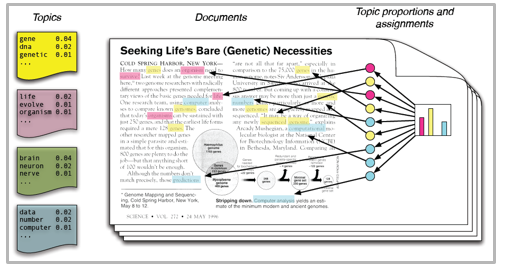

In [29]:
#Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Modeling1.png')
Image(filename='datasets/Figs/Modeling1.png')

#### 2.1 - Alocação de Dirichlet Latente para modelagem de tópicos

Existem muitas abordagens para obter tópicos de um texto como - Frequência de termos e Frequência inversa de documentos. Técnicas de fatoração de matriz não negativa. A Alocação Latente de Dirichlet é a técnica de modelagem de tópicos mais popular e, neste artigo, discutiremos o mesmo.

A LDA assume que os documentos são produzidos a partir de uma mistura de tópicos. Esses tópicos geram palavras com base em sua distribuição de probabilidade. Dado um conjunto de dados de documentos, Backtracks LDA e tenta descobrir o que tópicos criaria esses documentos em primeiro lugar.

LDA é uma técnica de fatoração matricial. No espaço vetorial, qualquer corpus (coleção de documentos) pode ser representado como uma matriz termo-documento. A matriz a seguir mostra um corpus de N documentos D1, D2, D3… Dn e tamanho do vocabulário das palavras M W1, W2 .. Wn. O valor da célula i, j fornece a contagem de frequências da palavra Wj no Documento Di.

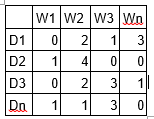

In [30]:
#Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Modeling2.png')
Image(filename='datasets/Figs/Modeling2.png')

LDA converts this Document-Term Matrix into two lower dimensional matrices – M1 and M2.
M1 is a document-topics matrix and M2 is a topic – terms matrix with dimensions (N,  K) and (K, M) respectively, where N is the number of documents, K is the number of topics and M is the vocabulary size.  

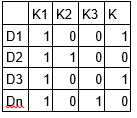

In [26]:
Image(filename='datasets/Figs/modeling3.png')

Notice that these two matrices already provides topic word and document topic distributions, However, these distribution needs to be improved, which is the main aim of LDA. LDA makes use of sampling techniques in order to improve these matrices.  

It Iterates through each word “w” for each document “d” and tries to adjust the current topic – word assignment with a new assignment. A new topic “k” is assigned to word “w” with a probability P which is a product of two probabilities p1 and p2.  

For every topic, two probabilities p1 and p2 are calculated. P1 – p(topic t / document d) = the proportion of words in document d that are currently assigned to topic t. P2 – p(word w / topic t) = the proportion of assignments to topic t over all documents that come from this word w.  

The current topic – word assignment is updated with a new topic with the probability, product of p1 and p2 . In this step, the model assumes that all the existing word – topic assignments except the current word are correct. This is essentially the probability that topic t generated word w, so it makes sense to adjust the current word’s topic with new probability.  

After a number of iterations, a steady state is achieved where the document topic and topic term distributions are fairly good. This is the convergence point of LDA.  

 
Parameters of LDA  

Alpha and Beta Hyperparameters – alpha represents document-topic density and Beta represents topic-word density. Higher the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain fewer topics. On the other hand, higher the beta, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.  

Number of Topics – Number of topics to be extracted from the corpus. Researchers have developed approaches to obtain an optimal number of topics by using Kullback Leibler Divergence Score. I will not discuss this in detail, as it is too mathematical. For understanding, one can refer to this[1] original paper on the use of KL divergence.  

Number of Topic Terms – Number of terms composed in a single topic. It is generally decided according to the requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a higher number, if problem statement talks about extracting features or terms, a low number is recommended.  

Number of Iterations / passes – Maximum number of iterations allowed to LDA algorithm for convergence.  

#### 2.2 - Topic Modeling Example 1 - Gensim

In [27]:
# Here are the sample documents combining together to form a corpus.

doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

Cleaning and Preprocessing

Cleaning is an important step before any text mining task, in this step, we will remove the punctuations, stopwords and normalize the corpus.  

In [28]:
nltk.download('stopwords')
nltk.download('wordnet')
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

[nltk_data] Downloading package stopwords to /home/heber/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/heber/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preparing Document-Term Matrix

All the text documents combined is known as the corpus. To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. LDA model looks for repeating term patterns in the entire DT matrix. Python provides many great libraries for text mining practices, “gensim” is one such clean and beautiful library to handle text data. It is scalable, robust and efficient. Following code shows how to convert a corpus into a document-term matrix.  

In [30]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Running LDA Model  

Next step is to create an object for LDA model and train it on Document-Term matrix. The training also requires few parameters as input which are explained in the above section. The gensim module allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents.

In [31]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [32]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.065*"father" + 0.065*"sister" + 0.065*"driving"'), (1, '0.135*"sugar" + 0.054*"like" + 0.054*"consume"'), (2, '0.071*"pressure" + 0.041*"better" + 0.041*"school"')]


#### 2.3 - Topic Modeling Example 2 (Scikit Learn)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

Gensim is an awesome library and scales really well to large text corpuses. Gensim, however does not include Non-negative Matrix Factorization (NMF), which can also be used to find topics in text. The mathematical basis underpinning NMF is quite different from LDA. NMF sometimes produces more meaningful topics for smaller datasets. NMF has been included in Scikit Learn for quite a while but LDA has only recently (late 2015) been included. The great thing about using Scikit Learn is that it brings API consistency which makes it almost trivial to perform Topic Modeling using both LDA and NMF. Scikit Learn also includes seeding options for NMF which greatly helps with algorithm convergence and offers both online and batch variants of LDA.

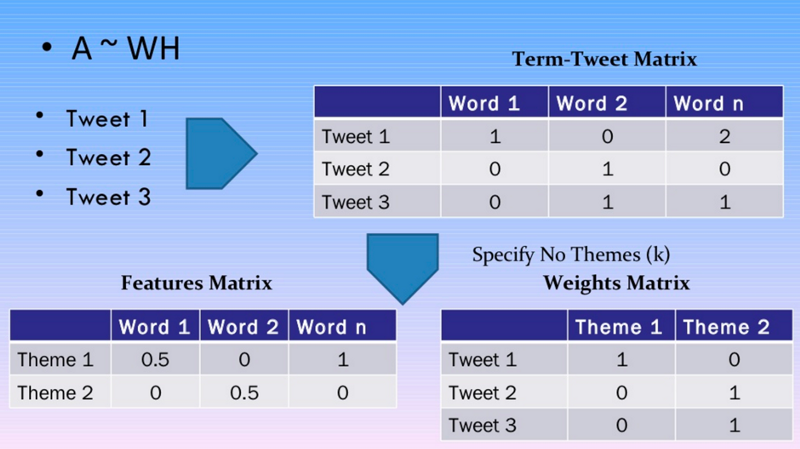

In [35]:
display(Image(os.path.join('datasets/','Figs', 'nmf.png'), width=700))

In [36]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [37]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

The creation of the bag of words matrix is very easy in Scikit Learn — all the heavy lifting is done by the feature extraction functionality provided for text datasets. A tf-idf transformer is applied to the bag of words matrix that NMF must process with the TfidfVectorizer. LDA on the other hand, being a probabilistic graphical model (i.e. dealing with probabilities) only requires raw counts, so a CountVectorizer is used. Stop words are removed and the number of terms included in the bag of words matrix is restricted to the top 1000.

In [38]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [39]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

As mentioned previously the algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both NMF and LDA. Initialising the W and H matrices in NMF with ‘nndsvd’ rather than random initialisation improves the time it takes for NMF to converge. LDA can also be set to run in either batch or online mode.

In [40]:
no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

Displaying and Evaluating Topics

The structure of the resulting matrices returned by both NMF and LDA is the same and the Scikit Learn interface to access the returned matrices is also the same. This is great and allows for a common Python method that is able to display the top words in a topic. Topics are not labeled by the algorithm — a numeric index is assigned.

The derived topics from NMF and LDA are displayed below. From the NMF derived topics, Topic 0 and 8 don’t seem to be about anything in particular but the other topics can be interpreted based upon there top words. LDA for the 20 Newsgroups dataset produces 2 topics with noisy data (i.e., Topic 4 and 7) and also some topics that are hard to interpret (i.e., Topic 3 and Topic 9). I’d say the NMF was able to find more meaningful topics in the 20 Newsgroups dataset.

In [41]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
people time right did good said say make way government
Topic 1:
window problem using server application screen display motif manager running
Topic 2:
god jesus bible christ faith believe christian christians sin church
Topic 3:
game team year games season players play hockey win league
Topic 4:
new 00 sale 10 price offer shipping condition 20 15
Topic 5:
thanks mail advance hi looking info help information address appreciated
Topic 6:
windows file files dos program version ftp ms directory running
Topic 7:
edu soon cs university ftp internet article email pub david
Topic 8:
key chip clipper encryption keys escrow government public algorithm nsa
Topic 9:
drive scsi drives hard disk ide floppy controller cd mac
Topic 10:
just ll thought tell oh little fine work wanted mean
Topic 11:
does know anybody mean work say doesn help exist program
Topic 12:
card video monitor cards drivers bus vga driver color memory
Topic 13:
like sounds looks look bike sound lot things really thing
To

In [42]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
people gun state control right guns crime states law police
Topic 1:
time question book years did like don space answer just
Topic 2:
mr line rules science stephanopoulos title current define int yes
Topic 3:
key chip keys clipper encryption number des algorithm use bit
Topic 4:
edu com cs vs w7 cx mail uk 17 send
Topic 5:
use does window problem way used point different case value
Topic 6:
windows thanks know help db does dos problem like using
Topic 7:
bike water effect road design media dod paper like turn
Topic 8:
don just like think know people good ve going say
Topic 9:
car new price good power used air sale offer ground
Topic 10:
file available program edu ftp information files use image version
Topic 11:
ax max b8f g9v a86 145 pl 1d9 0t 34u
Topic 12:
government law privacy security legal encryption court fbi technology information
Topic 13:
card bit memory output video color data mode monitor 16
Topic 14:
drive scsi disk mac hard apple drives controller software port
T

#### 2.4 - Tips to improve results of topic modeling

The results of topic models are completely dependent on the features (terms) present in the corpus. The corpus is represented as document term matrix, which in general is very sparse in nature. Reducing the dimensionality of the matrix can improve the results of topic modelling. Based on my practical experience, there are few approaches which do the trick.  

1. Frequency Filter – Arrange every term according to its frequency. Terms with higher frequencies are more likely to appear in the results as compared ones with low frequency. The low frequency terms are essentially weak features of the corpus, hence it is a good practice to get rid of all those weak features. An exploratory analysis of terms and their frequency can help to decide what frequency value should be considered as the threshold.  

2. Part of Speech Tag Filter – POS tag filter is more about the context of the features than frequencies of features. Topic Modelling tries to map out the recurring patterns of terms into topics. However, every term might not be equally important contextually. For example, POS tag IN contain terms such as – “within”, “upon”, “except”. “CD” contains – “one”,”two”, “hundred” etc. “MD” contains “may”, “must” etc. These terms are the supporting words of a language and can be removed by studying their post tags.  

3. Batch Wise LDA –In order to retrieve most important topic terms, a corpus can be divided into batches of fixed sizes. Running LDA multiple times on these batches will provide different results, however, the best topic terms will be the intersection of all batches.  

#### 2.5 - Topic Modelling for Feature Selection

Sometimes LDA can also be used as feature selection technique. Take an example of text classification problem where the training data contain category wise documents. If LDA is running on sets of category wise documents. Followed by removing common topic terms across the results of different categories will give the best features for a category.  

### 3 - Clustering and Topic Modeling applied to film synopses

In this guide, I will explain how to cluster a set of documents using Python. My motivating example is to identify the latent structures within the synopses of the top 100 films of all time (per an IMDB list). 

It will cover:

<ul>
<li> tokenizing and stemming each synopsis
<li> transforming the corpus into vector space using [tf-idf](http://en.wikipedia.org/wiki/Tf%E2%80%93idf)
<li> calculating cosine distance between each document as a measure of similarity
<li> clustering the documents using the [k-means algorithm](http://en.wikipedia.org/wiki/K-means_clustering)
<li> using [multidimensional scaling](http://en.wikipedia.org/wiki/Multidimensional_scaling) to reduce dimensionality within the corpus
<li> plotting the clustering output using [matplotlib](http://matplotlib.org/) and [mpld3](http://mpld3.github.io/)
<li> conducting a hierarchical clustering on the corpus using [Ward clustering](http://en.wikipedia.org/wiki/Ward%27s_method)
<li> plotting a Ward dendrogram
<li> topic modeling using [Latent Dirichlet Allocation (LDA)](http://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
</ul>

#### 3.1 - Contents

<ul>
<li>[Stopwords, stemming, and tokenization](#Stopwords,-stemming,-and-tokenizing)
<li>[Tf-idf and document similarity](#Tf-idf-and-document-similarity)
<li>[K-means clustering](#K-means-clustering)
<li>[Multidimensional scaling](#Multidimensional-scaling)
<li>[Visualizing document clusters](#Visualizing-document-clusters)
<li>[Hierarchical document clustering](#Hierarchical-document-clustering)
<li>[Latent Dirichlet Allocation (LDA)](#Latent-Dirichlet-Allocation)
</ul>

But first, I import everything I am going to need up front

#### 3.1.1 - import three lists: titles, links and wikipedia synopses  

In [43]:
titles = open(os.path.join(datapath, 'title_list.txt')).read().split('\n')
#ensures that only the first 100 are read in
titles = titles[:100]
print(str(len(titles)) + ' titles')

print(titles[0:5])

100 titles
['The Godfather', 'The Shawshank Redemption', "Schindler's List", 'Raging Bull', 'Casablanca']


In [44]:
links = open(os.path.join(datapath, 'link_list_imdb.txt')).read().split('\n')
links = links[:100]
print(str(len(links)) + ' links')

print(links[0:5])

100 links
['http://www.imdb.com/title/tt0068646/', 'http://www.imdb.com/title/tt0111161/', 'http://www.imdb.com/title/tt0108052/', 'http://www.imdb.com/title/tt0081398/', 'http://www.imdb.com/title/tt0034583/']


In [45]:
synopses_wiki = open(os.path.join(datapath, 'synopses_list_wiki.txt')).read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki

print(str(len(synopses_wiki)) + ' synopses')

print(synopses_wiki[0][0:627])

100 synopses
  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter's wedd


In [46]:
synopses_imdb = open(os.path.join(datapath,'synopses_list_imdb.txt')).read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]
synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_imdb.append(text)

synopses_imdb = synopses_clean_imdb

print(str(len(synopses_imdb)) + ' synopses')

print(synopses_imdb[0][0:627])

100 synopses


In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two y


In [47]:
#Joining the two synopses sources

synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)
    
synopses[0]

'  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson   Johnny Fontane  Johnny Fontane  , a pop

#### 3.1.2 - Importing the genres

In [48]:
genres = open(os.path.join(datapath,'genres_list.txt')).read().split('\n')
genres = genres[:100]
print(str(len(genres)) + ' genres')

print(genres[0:5])

100 genres
["[u' Crime', u' Drama']", "[u' Crime', u' Drama']", "[u' Biography', u' Drama', u' History']", "[u' Biography', u' Drama', u' Sport']", "[u' Drama', u' Romance', u' War']"]


In [49]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(titles)):
    ranks.append(i)

#### 3.1.3 - Stopwords, stemming, and tokenizing

This section is focused on defining some functions to manipulate the synopses. First, I load [NLTK's](http://www.nltk.org/) list of English stop words. [Stop words](http://en.wikipedia.org/wiki/Stop_words) are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [50]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

Next I import the [Snowball Stemmer](http://snowball.tartarus.org/) which is actually part of NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) is just the process of breaking a word down into its root.

In [51]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


Below I define two functions:

<ul>
<li> *tokenize_and_stem*: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token <li> *tokenize_only*: tokenizes the synopsis only
</ul>

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. Guess what, I do want to do that!



In [52]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Below I use my stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized. 

In [53]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Using these two lists, I create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For my purposes this is fine--I'm perfectly happy returning the first token associated with the stem I need to look up.

In [54]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

#### 3.1.4 - Tf-idf and document similarity

<img src='http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402' align='right' style="margin-left:10px">

Here, I define term frequency-inverse document frequency (tf-idf) vectorizer parameters and then convert the *synopses* list into a tf-idf matrix. 

To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix. An example of a dtm is here at right.

Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

A couple things to note about the parameters I define below:

<ul>
<li> max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
<li> min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
<li> ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See [n-grams](http://en.wikipedia.org/wiki/N-gram)
</ul>

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, 
                                   max_features=200000,
                                   min_df=0.2, 
                                   stop_words='english',
                                   use_idf=True, 
                                   tokenizer=tokenize_and_stem, 
                                   ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)

/home/heber/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 11.2 s, sys: 59.6 ms, total: 11.3 s
Wall time: 11.3 s
(100, 564)


In [56]:
terms = tfidf_vectorizer.get_feature_names()

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

#### 3.1.5 - K-means clustering

Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose [k-means](http://en.wikipedia.org/wiki/K-means_clustering). K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and  centroids recalculated in an iterative process until the algorithm reaches convergence.

I found it took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima. 

In [58]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 1.05 s, sys: 0 ns, total: 1.05 s
Wall time: 1.08 s


In [59]:
from sklearn.externals import joblib

joblib.dump(km, os.path.join(outputs, 'doc_cluster.pkl'))
km = joblib.load(os.path.join(outputs, 'doc_cluster.pkl'))
clusters = km.labels_.tolist()

/home/heber/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [60]:
films = {'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres}
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

In [61]:
frame.head()

,rank,title,cluster,genre
2,0,The Godfather,2,"[u' Crime', u' Drama']"
3,1,The Shawshank Redemption,3,"[u' Crime', u' Drama']"
3,2,Schindler's List,3,"[u' Biography', u' Drama', u' History']"
2,3,Raging Bull,2,"[u' Biography', u' Drama', u' Sport']"
4,4,Casablanca,4,"[u' Drama', u' Romance', u' War']"


In [62]:
frame['cluster'].value_counts()

2    29
4    23
0    21
3    20
1     7
Name: cluster, dtype: int64

In [63]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    55.190476
1    59.428571
2    46.965517
3    35.900000
4    56.304348
Name: rank, dtype: float64

In [64]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'mr.', b'john', b'home', b'says', b"n't", b'running',

Cluster 0 titles: The Wizard of Oz, Forrest Gump, E.T. the Extra-Terrestrial, 2001: A Space Odyssey, 12 Angry Men, Gandhi, Unforgiven, Rocky, To Kill a Mockingbird, My Fair Lady, Butch Cassidy and the Sundance Kid, City Lights, Mr. Smith Goes to Washington, Shane, The Green Mile, Nashville, American Graffiti, The African Queen, Stagecoach, A Clockwork Orange, Wuthering Heights,

Cluster 1 words: b'george', b'marries', b'perform', b'family', b'woman', b'friends',

Cluster 1 titles: It's a Wonderful Life, The Philadelphia Story, An American in Paris, The King's Speech, A Place in the Sun, Tootsie, Yankee Doodle Dandy,

Cluster 2 words: b'family', b'new', b'father', b'new', b'york', b'friends',

Cluster 2 titles: The Godfather, Raging Bull, Gone with the Wind, Citizen Kane, Titanic, The Godfather: Part II, On the Waterfront, The Sound of Music, The Silence of the Lambs, A Streetcar Named Desir

In [65]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
frame['Title'] = frame['title']

In [66]:
#export tables to HTML
html_output = frame[['Rank', 'Title']].loc[frame['cluster'] == 1].to_html(index=False)

from IPython.core.display import display, HTML
display(HTML(html_output))

Rank,Title
27,It's a Wonderful Life
42,The Philadelphia Story
44,An American in Paris
66,The King's Speech
68,A Place in the Sun
76,Tootsie
100,Yankee Doodle Dandy


#### 3.1.6 - Multidimensional scaling

In [67]:
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [68]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

#### 3.1.7 - Visualizing document clusters

In [69]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

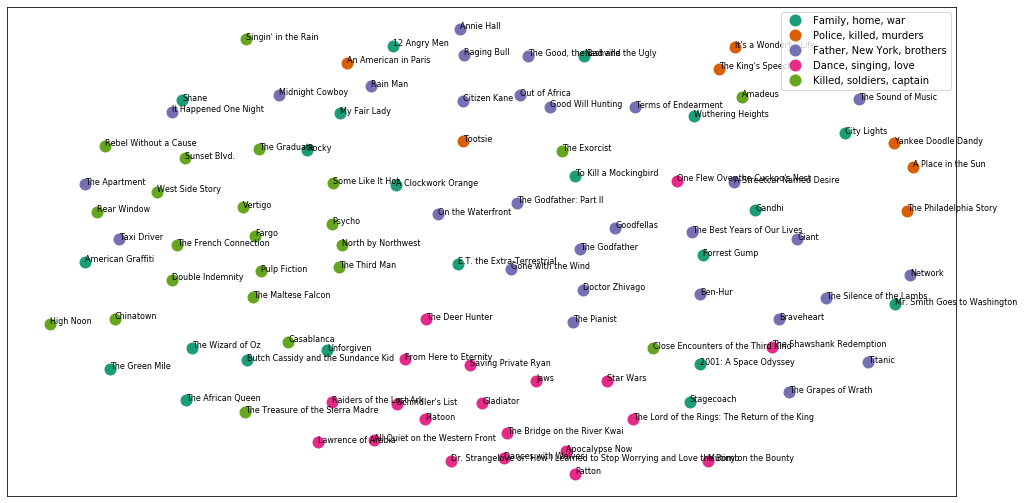

<Figure size 432x288 with 0 Axes>

In [70]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

plt.show()

#Saving the Fig
plt.savefig(os.path.join(outputs,'clusters_small_noaxes.png'), dpi=200)

The clustering plot looks great, but it would be better without overlapping labels. We are going to use D3.js (http://d3js.org/), a browser based/javascript interactive. We will use a matplotlib D3 wrapper called mpld3 (https://mpld3.github.io/). Mpld3 basically let's you use matplotlib syntax to create web interactives. It has a really easy, high-level API for adding tooltips on mouse hover, which is what I am interested in.

It also has some nice functionality for zooming and panning. The below javascript snippet basicaly defines a custom location for where the zoom/pan toggle resides. Don't worry about it too much and you actually don't need to use it, but it helped for formatting purposes when exporting to the web later. The only thing you might want to change is the x and y attr for the position of the toolbar.

In [71]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [72]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

In [73]:
#uncomment the below to export to html
#os.chdir(outputs)
#html = mpld3.fig_to_html(fig)
#print(html)

#### 3.1.8 - Hierarchical document clustering

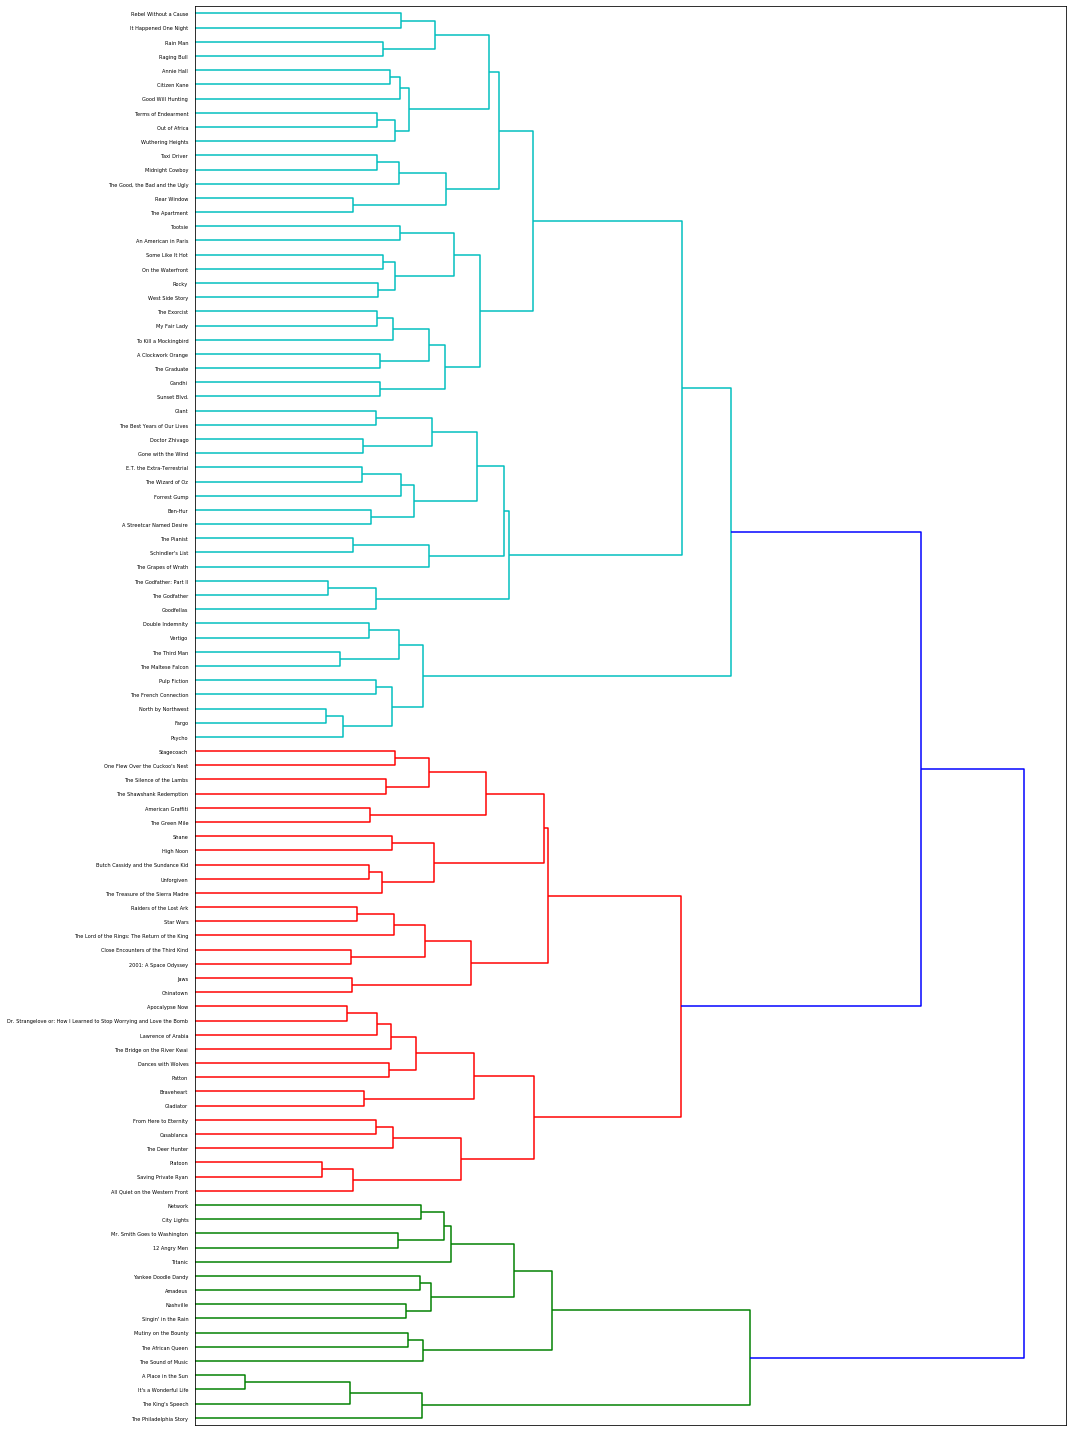

In [74]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tight_layout() #show plot with tight layout
plt.savefig(os.path.join(outputs,'ward_clusters.png'), dpi=200)

#### 3.1.9 - Latent Dirichlet Allocation

In [75]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [76]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [77]:
#Latent Dirichlet Allocation implementation with Gensim
from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in synopses]

%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 5.3 s, sys: 15.7 ms, total: 5.31 s
Wall time: 5.31 s
CPU times: user 483 ms, sys: 83 µs, total: 483 ms
Wall time: 483 ms


In [78]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

1836


In [79]:
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=1, no_above=0.8)
corpus = [dictionary.doc2bow(text) for text in texts]

In [80]:
len(corpus)

100

In [81]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 2min 23s, sys: 3.92 s, total: 2min 27s
Wall time: 1min 13s


In [82]:
print(lda[corpus[0]])

[(3, 0.9995042)]


In [83]:
topics = lda.print_topics(5, num_words=20)

In [84]:
lda.show_topics()

[(0,
  '0.005*"love" + 0.005*"attempt" + 0.005*"kill" + 0.004*"arriv" + 0.004*"day" + 0.004*"men" + 0.003*"film" + 0.003*"first" + 0.003*"shoot" + 0.003*"home"'),
 (1,
  '0.005*"go" + 0.004*"friend" + 0.004*"n\'t" + 0.004*"car" + 0.004*"come" + 0.004*"famili" + 0.003*"sing" + 0.003*"love" + 0.003*"perform" + 0.003*"night"'),
 (2,
  '0.004*"two" + 0.004*"home" + 0.004*"ask" + 0.004*"arriv" + 0.004*"help" + 0.004*"prison" + 0.004*"say" + 0.003*"kill" + 0.003*"friend" + 0.003*"meet"'),
 (3,
  '0.006*"kill" + 0.006*"father" + 0.006*"famili" + 0.005*"ask" + 0.004*"meet" + 0.004*"say" + 0.004*"friend" + 0.004*"home" + 0.004*"n\'t" + 0.004*"two"'),
 (4,
  '0.008*"kill" + 0.006*"men" + 0.006*"soldier" + 0.005*"shark" + 0.004*"offic" + 0.004*"day" + 0.004*"order" + 0.004*"two" + 0.003*"call" + 0.003*"run"')]

In [85]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [86]:
topics_matrix[0]

(0,
 [('love', 0.005275022),
  ('attempt', 0.005179185),
  ('kill', 0.0047456785),
  ('arriv', 0.0039517274),
  ('day', 0.0037828486),
  ('men', 0.0035056504),
  ('film', 0.0033826292),
  ('first', 0.00333608),
  ('shoot', 0.003159301),
  ('home', 0.0031550392),
  ('night', 0.0031259179),
  ('war', 0.003107103),
  ('order', 0.003074012),
  ('apart', 0.0030442022),
  ('run', 0.0029728978),
  ('command', 0.00289383),
  ('forc', 0.0027568424),
  ('offic', 0.0026752516),
  ('away', 0.0026100632),
  ('turn', 0.0025038982)])

In [87]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/home/heber/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.028700  0.018758       1        1  35.103462
2      0.020927  0.008258       2        1  20.180666
4      0.022767 -0.108550       3        1  17.746229
1      0.054444  0.066757       4        1  17.294958
0     -0.126838  0.014777       5        1   9.674678, topic_info=     Category        Freq     Term       Total  loglift  logprob
5516  Default  109.000000    shark  109.000000  30.0000  30.0000
610   Default  197.000000  soldier  197.000000  29.0000  29.0000
395   Default  279.000000     love  279.000000  28.0000  28.0000
408   Default  319.000000      men  319.000000  27.0000  27.0000
57    Default  249.000000  attempt  249.000000  26.0000  26.0000
...       ...         ...      ...         ...      ...      ...
56     Topic5   24.786482   attack  193.582230   0.2803  -6.1229
583    Topic5   24.671619      set  188.037979   0.3047  -6.1275
74     Topic5   25.032513    becom  277.604675  -0.0704  -6.1130
729    Topic5   24.495516    would  220.101303   0.1401  -6.1347
713    Topic5   24.568979      way  252.586349   0.0054  -6.1317

[436 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5166      3  0.952312  101st
4694      5  0.762090  843rd
7748      2  0.952368    9th
3509      4  0.964240  abbey
6         1  0.856892   abus
...     ...       ...    ...
731       1  0.561155   year
731       2  0.239717   year
731       3  0.049033   year
731       4  0.103514   year
731       5  0.038137   year

[928 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

#### 3.1.10 - [Enhancing TM Models](https://datascience.blog.wzb.eu/2017/11/09/topic-modeling-evaluation-in-python-with-tmtoolkit/)

In [88]:
#TBD